# Fitting a simple model

This is a notebook to exemplify the use of the `tsp.sa.SimulatedAnnealingTSP` class. This class uses a Markov Chain Monte Carlo (MCMC) type algorithm called Simulated Annealing (SA) to estimate the optimal route in the Traveling Salesman Problem (TSP).

To exemplify the use of this class, we will start by generating a toy dataset.

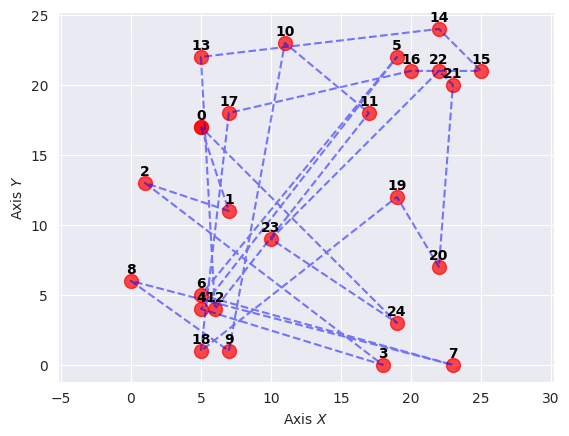

In [1]:
import numpy as np

from tsp.utils import sample_coordinates, plot_route

rng = np.random.default_rng(99301023485)

coords = sample_coordinates(25, seed=rng)

plot_route(coords)

From these coordinates, the associated distance matrix is

In [2]:
from tsp.utils import distance_matrix

dist_matrix = distance_matrix(coords)
dist_matrix.shape

(25, 25)

An instance of the `SimulatedAnnealingTSP` class shall now be created. This class implements the SA algorithm applied specifically to the TSP. To create an instance of this class, it is sufficient to provide the matrix of distances between the routes.

In [3]:
from tsp import SimulatedAnnealingTSP

model_sa = SimulatedAnnealingTSP(
    dist_matrix,
    seed=rng,
)

And the model will be run to find the optimal route. By default, the model is limited to 1,000,000 iterations, but will stop early if no changes have been accepted after 10,000 iterations.

In [4]:
%%time
model_sa.run()

CPU times: total: 875 ms
Wall time: 881 ms


Through the `best_value` and `best_route` properties, the best value and associated best route of the algorithm can be found.

In [5]:
model_sa.best_value

5.524060723516054

In the next cell you can see the optimal route of the algorithm plotted.

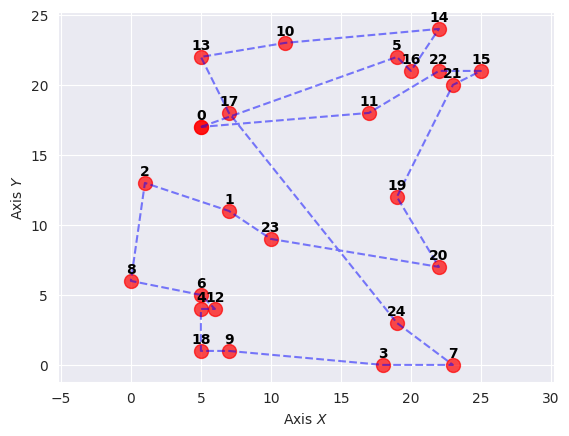

In [6]:
plot_route(coords, route=model_sa.best_route)

And you can also see a summary of how the algorithm performed over the iterations.

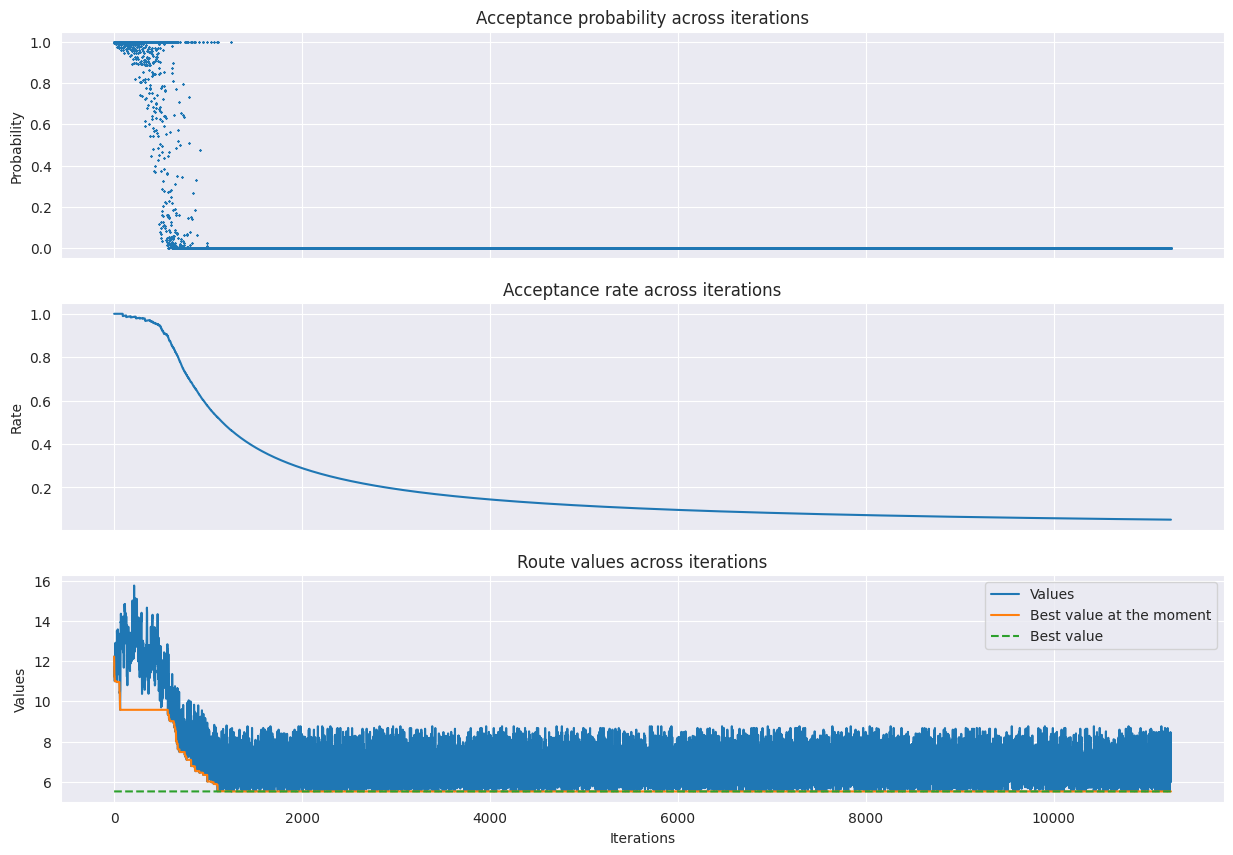

In [7]:
from tsp.sa import plot_summary_sa

plot_summary_sa(model_sa)

Notice that the route can be improved, and this is because by default, the algorithm uses a kernel that performs a swap between two cities in the route. The next section will show how to improve the performance of the algorithm by changing the kernel.

# Tuning the parameters

The performance of the algorithm can be improved by modifying some parameters of the class. Let's start by talking about the *kernels*: the kernels in the algorithm allow to decide the way in which a "jump" will be made in the graph in which the SA is performed. Or in simpler words, it allows to decide how a modification of the previous route will be made, which will be the next candidate in the SA.

The available kernels can be found in the `tsp.kernels` module, where there is also the possibility of mixing between several kernels through the `MixingKernelTSP`, where there is also the possibility to choose the weights assigned to each kernel. An example of the use of this class can be seen below:

In [8]:
from tsp.kernels import *

mixing_kernel = MixingKernelTSP(
    kernels=[
        (  20, SwapKernelTSP(rng)),
        (  50, ReversionKernelTSP(rng)),
        (  30, InsertionKernelTSP(rng)),
        (0.05, RandomWalkKernelTSP(rng)),
    ],
    seed=rng,
)

And you can use this kernel in the `SimulatedAnnealingTSP` class. Additionally, you can provide a cooling schedule function, or instantiate existing functions in `tsp.utils`, by modifying the initial parameters. Further information can be found in the `SimulatedAnnealingTSP` documentation.

In [9]:
from tsp.utils import exponential_cooling_schedule


model_sa = SimulatedAnnealingTSP(
    dist_matrix,
    n_iter=10_000_000,
    kernel=mixing_kernel,
    cooling_schedule=exponential_cooling_schedule(rho=0.999),
    early_stop=True,
    stop_after=10_000,
    seed=rng,
)

We run the model...

In [10]:
%%time
model_sa.run()

CPU times: total: 2.25 s
Wall time: 2.24 s


And we look at the best value that optimisation provides:

In [11]:
model_sa.best_value

3.9429369720181855

It can be noted that the value of the total distance that the route realised is significantly better than in the previous case. If we look at the map, we can see that the solution looks better than the previous solution.

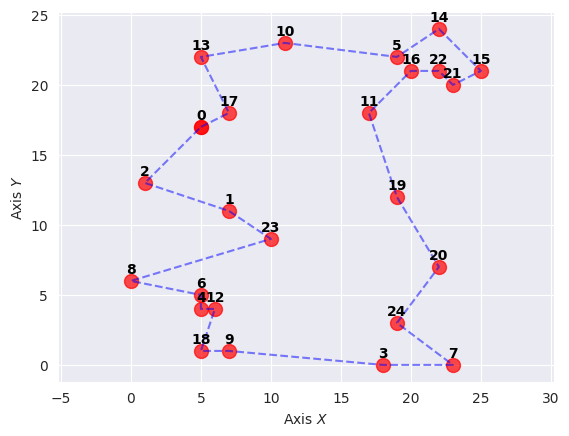

In [12]:
plot_route(coords, route=model_sa.best_route)

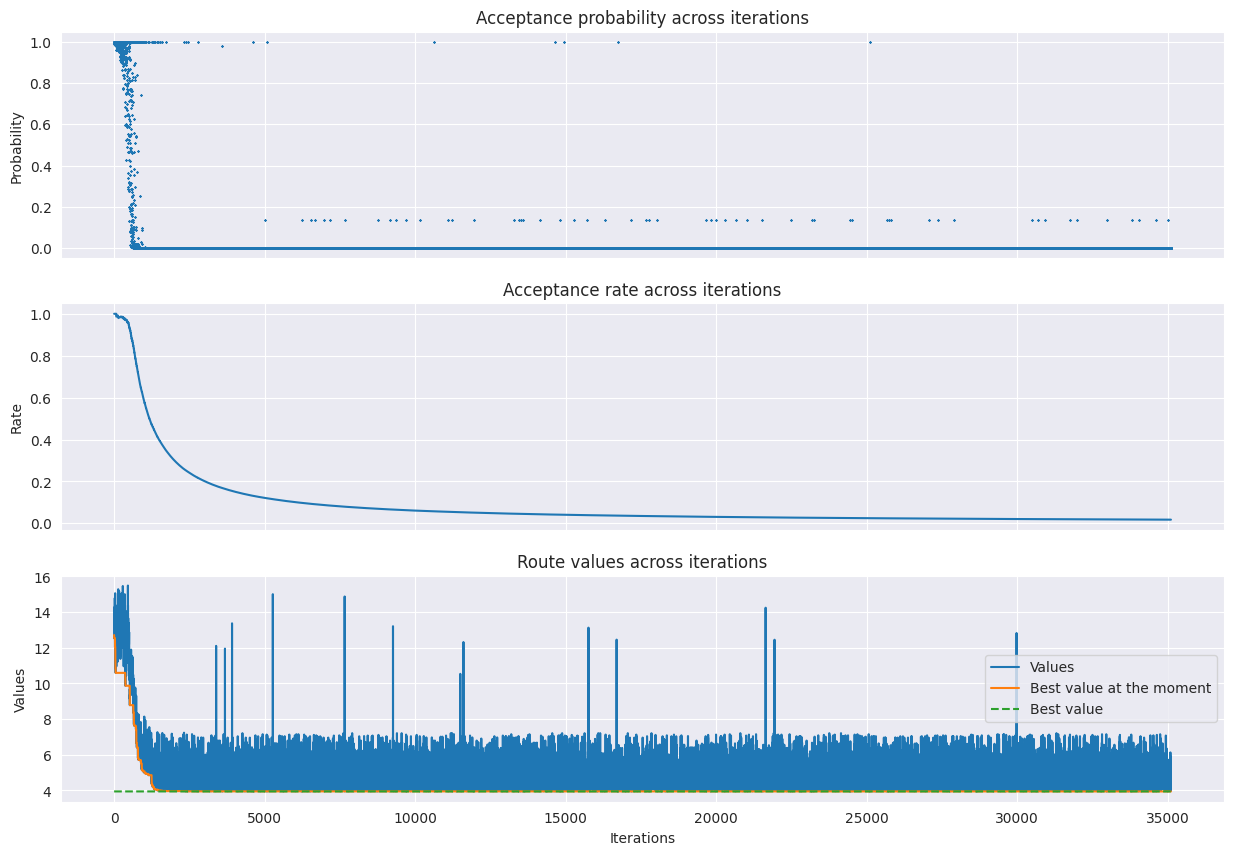

In [13]:
plot_summary_sa(model_sa)